# Predicting Employee Turnover

<img src="employeeturnover.jpeg">

## Objective
- Understand what factors contribute most to employee turnover
- Perform Clustering to find patterns of employee traits
- Create a model that predicts the likelihood if a certain employee will leave/stay the company
- create/improve different retention strategies on employees with the highest risk of quitting

The dataset for this project can be found on [Kaggle](https://www.kaggle.com/gummulasrikanth/hr-employee-retention).

### Import Libraries

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

### The Data

In [2]:
df_employee_attributes = pd.read_csv('HR_comma_sep.csv')

In [3]:
df_employee_attributes.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df_employee_attributes = df_employee_attributes.rename(columns={
                        'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [5]:
df_employee_attributes.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Data Quality Check

In [6]:
# Number of entries and entry type
df_employee_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction           14999 non-null float64
evaluation             14999 non-null float64
projectCount           14999 non-null int64
averageMonthlyHours    14999 non-null int64
yearsAtCompany         14999 non-null int64
workAccident           14999 non-null int64
turnover               14999 non-null int64
promotion              14999 non-null int64
department             14999 non-null object
salary                 14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df_employee_attributes.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

Summary: From this initial correlation matrix, we observe some weak correlations between features. The pairwise relationships that we observe are:
- Project Count vs Evaluation, 
- Average Monthly Hours vs Evaluation, 
- Project Count vs average Monthly Hours.

In [8]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover)
turnover_Summary = df_employee_attributes.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [9]:
turnover_Summary.std()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


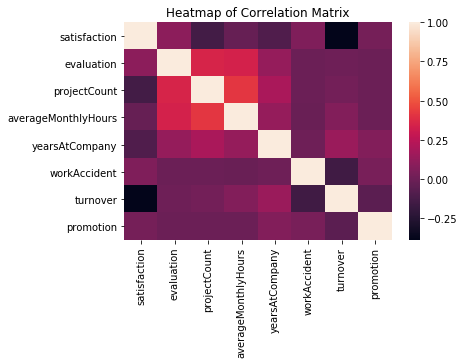

In [10]:
corr = df_employee_attributes.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix');

In [11]:
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


### EDA 1. Satisfaction, Evaluation, and averageMonthly Hours distributions

Summary:

$\bf{Clusters \ of \ Employees}$:

If we are to look ath the Evaluation vs Satisfaction, the data gives rise to 3 turnover clusters.

- Cluster 1: Employees are evaluated highly but are not satisfied
- Cluster 2: Employees are evaluated lower and are not satisfied
- Cluster 3: Employees are evaluated highly and are satisfied

If we are to speculate,
- Cluster 1 can be considered overworked and underappreciated. 
- Cluster 2 can be considered the employees that are under performing and feel overwhelmed by the amount of work they are given
- Cluster 3 can be considered employees that are excelling at their job and are finding other job oppertunities 

Coincidentally, the averageMonthlyHours vs Satisfaction scatter plot is shown to have similar clustering to that of the Evaluation vs Satisfaction. This can be explained by the correlation we found previously 

$\bf{Distribution \ of \ Employees}$:
- Satisfaction:
    - The distribution is trimodal
    - Employees who had low (0.0-0.5) or high (0.65-1.0) satisfaction scores generally left the company more
- Evaluation:
    - The distribution is bimodal
    - Employees who had mid (mean:~0.5) or high (mean:~0.9) evaluation scores generally left the company
- AverageMonthlyHours:
    - The distribution is bimodal
    - Employees that left are either underworked (mean:~150 Hours) or overworked (mean:~260 Hours)

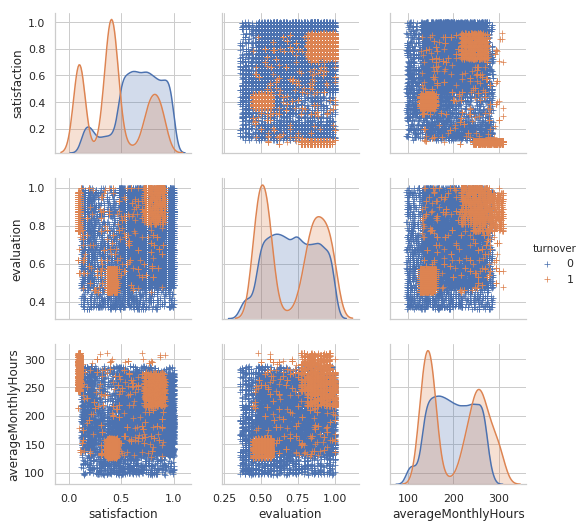

In [302]:
sns.pairplot(df_employee_attributes,hue='turnover',vars=["satisfaction","evaluation","averageMonthlyHours"],markers="+")

#### K means Clustering 

Let us pursue Evaluation vs Satisfaction. We can use K-Means Clustering to cluster the three described employee groups. 

In our clustering algorithm, blue represents hard working and under appreciated employees, red represents overworked and overwhelmed employeesm, and green represents employees that are excelling at their job.

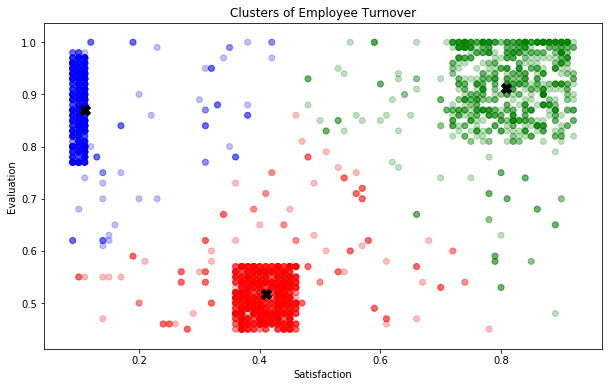

In [13]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_employee_attributes[df_employee_attributes.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df_employee_attributes[df_employee_attributes.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

### EDA 2. Employee Project Count

Summary:
- Employees with less than 2 projects or greater than 5 projects left the company
- Majority of employees that did not leave have 3-5 projects
- As you increase the amount of projects an employee holds, the greater the probability he/she will leave the company
    - Too little projects also has this effect
        - Note: the employee could be intern/contracted employee which has a larger turnover rate

/Users/abdoniniguez/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Percent')]

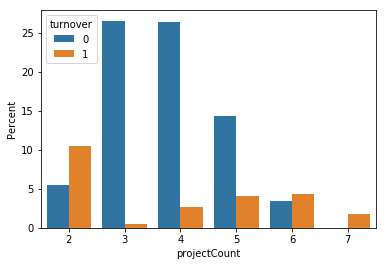

In [14]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df_employee_attributes, estimator=lambda x: len(x) / len(df_employee_attributes) * 100)
ax.set(ylabel="Percent")

### EDA 3. Employee Department Distributions

Summary:
- Sales is their largest department and is known to have a high turnover due to their salary being based on commission 
- 15-25% of employees leave each department

In [15]:
Department_distribution = pd.DataFrame(df_employee_attributes[df_employee_attributes['turnover']==0]['department'].value_counts())
Department_distribution.columns = ['Stayed']
Department_distribution['Left'] = df_employee_attributes[df_employee_attributes['turnover']==1]['department'].value_counts().values
Department_distribution

,Stayed,Left
sales,3126,1014
technical,2023,697
support,1674,555
IT,954,273
product_mng,704,215
RandD,666,204
marketing,655,203
accounting,563,198
management,539,121
hr,524,91


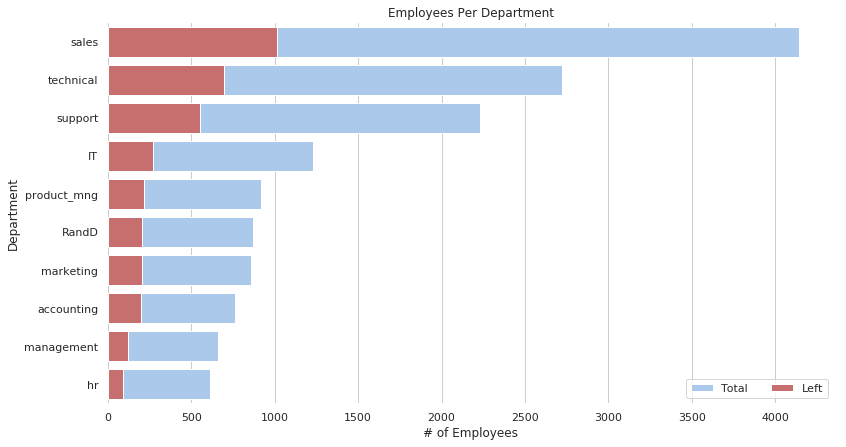

In [303]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 7))

sns.set_color_codes("pastel")
sns.barplot(x=Department_distribution.Stayed+Department_distribution.Left, y=Department_distribution.index.values,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x=Department_distribution.Left, y=Department_distribution.index.values,
            label="Left", color="r")

# # Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

### Pre-Processing

From our quality check, we know "department" and "salary" are categorical variables. Thus, we need to do some pre-processing to use in our ML algorithms.

In [17]:
df_employee_attributes['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
df_employee_attributes.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
df_employee_attributes.salary = df_employee_attributes.salary.astype('category')
df_employee_attributes.salary = df_employee_attributes.salary.cat.reorder_categories(['low', 'medium', 'high'])
df_employee_attributes.salary = df_employee_attributes.salary.cat.codes

In [20]:
departments = pd.get_dummies(df_employee_attributes.department)

In [21]:
new_df_employee_attributes = pd.concat([df_employee_attributes,departments],axis=1)

In [22]:
new_df_employee_attributes = new_df_employee_attributes.drop("department",axis=1);

In [23]:
new_df_employee_attributes.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Class imbalance

In [24]:
df_employee_attributes.turnover.value_counts(1)

0    0.761917
1    0.238083
Name: turnover, dtype: float64

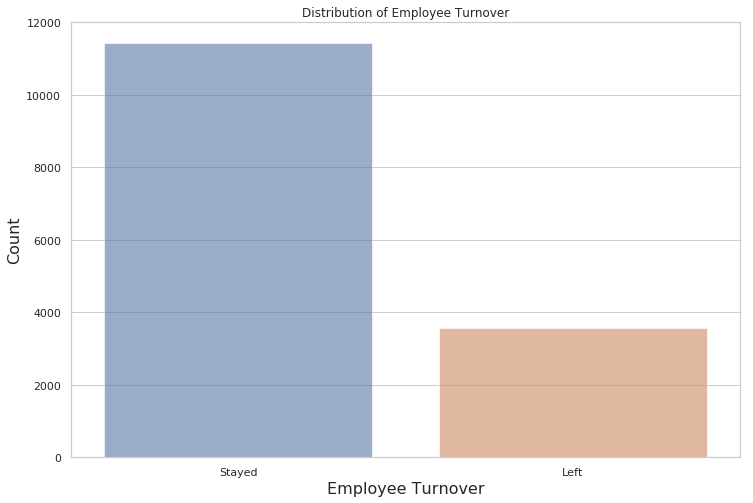

In [25]:
plt.figure(figsize=(12,8))
turnover = df_employee_attributes.turnover.value_counts()
sns.barplot(y=turnover.values, x=turnover.index, alpha=0.6)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Turnover', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks([0,1],['Stayed','Left']);

### Resample Method
Due to the imbalance of the data, we need to try different sampling approaches. For our dataset, we will be trying upsampling, upsampling using SMOTE, and downsampling.

In [26]:
features_c = ['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
              'yearsAtCompany', 'workAccident', 'promotion', 'salary',
              'IT','RandD', 'accounting', 'hr', 'management', 'marketing',
              'product_mng', 'sales', 'support', 'technical']
target_c = ['turnover']

In [291]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

X = new_df_employee_attributes[features_c]
y = new_df_employee_attributes[target_c]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

# Downsample majority class
X_train_down, y_train_down = resample(X_train[y_train['turnover'] == 0],
                                y_train[y_train['turnover'] == 0],
                                replace=True,
                                n_samples=X_train[y_train['turnover'] == 1].shape[0],
                                random_state=1)
X_train_down = np.concatenate((X_train[y_train['turnover'] == 1], X_train_down))
y_train_down = np.ravel(np.concatenate((y_train[y_train['turnover'] == 1], y_train_down)))


# Upsample using SMOTE
up_SMOTE = SMOTE(random_state=1, ratio = 1.0)
X_train_up_smote, y_train_up_smote = up_SMOTE.fit_sample(X_train, y_train)

# Upsample minority class
X_train_up, y_train_up = resample(X_train[y_train['turnover'] == 1],
                                y_train[y_train['turnover'] == 1],
                                replace=True,
                                n_samples=X_train[y_train['turnover'] == 0].shape[0],
                                random_state=1)


X_train_up = np.concatenate((X_train[y_train['turnover'] == 0], X_train_up))
y_train_up = np.ravel(np.concatenate((y_train[y_train['turnover'] == 0], y_train_up)))

y_train = np.ravel(y_train)
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_up.shape, y_train_up.shape)
print ("SMOTE sample shape:", X_train_up_smote.shape, y_train_up_smote.shape)
print("Downsampled shape:", X_train_down.shape, y_train_down.shape)

Original shape: (11999, 18) (11999,)
Upsampled shape: (18284, 18) (18284,)
SMOTE sample shape: (18284, 18) (18284,)
Downsampled shape: (5714, 18) (5714,)


### Testing Sampling Approaches

Our objective is to train a Logistic Regression model and an SVM model to our sampling approaches and find which performs the best.

__Results__: <br>

__Original Sample F1 score__: 46.9% (LogisticRegression), 89.9% (SVM)<br>
__Upsample F1 score__: 78% (LogisticRegression), 94.6% (SVM)<br>
__SMOTE F1 score__:78.7% (LogisticRegression), 95.1% (SVM)<br>
__Downsample F1 score__:78.2% (LogisticRegression), 93.5% (SVM)<br>

In both models, SMOTE gives the best performance. Thus, we will use SMOTE sampling technique for our models.

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsample": (X_train_up, y_train_up),
                "SMOTE":(X_train_up_smote, y_train_up_smote),
                "Downsample": (X_train_down, y_train_down)}

alg = {'LogisticRegression':LogisticRegression(),
      'SVM':SVC()}
                
# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    for mla in alg.keys():
        lr_results = cross_val_score(alg[mla], methods_data[method][0], methods_data[method][1], cv=10, scoring='f1')
        print("(",mla,")","The best F1 Score for", method, "data:")
        print (lr_results.mean())

( LogisticRegression ) The best F1 Score for Original data:
0.46899546964534666
( SVM ) The best F1 Score for Original data:
0.8994883709641017
( LogisticRegression ) The best F1 Score for Upsample data:
0.7802696026057256
( SVM ) The best F1 Score for Upsample data:
0.9462763409821436
( LogisticRegression ) The best F1 Score for SMOTE data:
0.7868871990990602
( SVM ) The best F1 Score for SMOTE data:
0.9506605403459505
( LogisticRegression ) The best F1 Score for Downsample data:
0.7823149811639872
( SVM ) The best F1 Score for Downsample data:
0.9349519883112405


### Training Models

1. Logistic Regression
2. Random Forest
3. Gradient Boosting 

### Logistic Regression

Summary:
- The best "C" value for the logistic regression model was 0.01
- F1 accuracy score: 79.8%
- AUC Score: 79.0%

In [288]:
c_vals =[0.0001,0.001,0.01,0.1,0.25,0.5,1]
lr_result = np.zeros(len(c_vals))
for i,j in enumerate(c_vals):
    lr_result[i] = cross_val_score(LogisticRegression(C=j,random_state=1), X_train_up_smote, y_train_up_smote, cv=10, scoring='f1').mean()

Text(0, 0.5, 'F1 Accuracy')

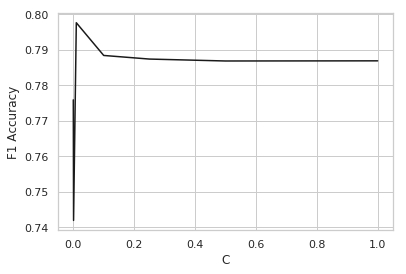

In [289]:
plt.plot(c_vals,lr_result,'k')
plt.xlabel('C')
plt.ylabel('F1 Accuracy')

In [230]:
best_cval = c_vals[np.argmax(lr_result)]

In [287]:
from sklearn.metrics import roc_auc_score

# Fit the model to SMOTE sampling data
lr = LogisticRegression(C=best_cval,random_state=1).fit(X_train_up_smote, y_train_up_smote)
lr_result = cross_val_score(LogisticRegression(), X_train_up_smote, y_train_up_smote, cv=10, scoring='f1')
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("\n\n ---Logistic Regression Model---")
print("Mean Cross Validation F1 Score: %2.2f" % lr_result.mean())
print ("Logistic Regression AUC = %2.2f" % lr_auc)



 ---Logistic Regression Model---
Mean Cross Validation F1 Score: 0.79
Logistic Regression AUC = 0.79


In [94]:
c_vals =[0.0001,0.001,0.01,0.1,0.25,0.5,1,2]
lr_auc_train = np.zeros(len(c_vals))
lr_auc_test = np.zeros(len(c_vals))
for i,j in enumerate(c_vals):
    lr = LogisticRegression(C=j,random_state=1).fit( X_train_up_smote, y_train_up_smote)
    lr_auc_train[i] = roc_auc_score(y_train_up_smote, lr.predict(X_train_up_smote))
    lr_auc_test[i] = roc_auc_score(y_test, lr.predict(X_test))

Text(0, 0.5, 'AUC Score')

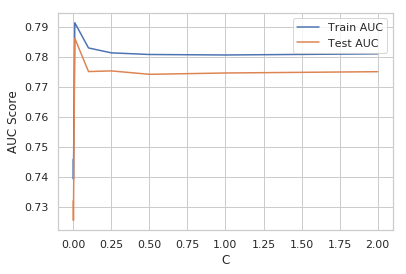

In [97]:
plt.plot(c_vals,lr_auc_train)
plt.plot(c_vals,lr_auc_test)
plt.legend(['Train AUC','Test AUC'])
plt.xlabel('C')
plt.ylabel('AUC Score')

### Random Forest

Summary: 
- F1 accuracy score: 99.0%
- AUC Score: 98.0%

In [295]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model (10-Fold Cross Validation)
rf = RandomForestClassifier()
rf_result = cross_val_score(rf, X_train_up_smote, y_train_up_smote, cv=10, scoring='f1')

rf = rf.fit(X_train_up_smote, y_train_up_smote)
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))

print ("\n\n ---Random Forest Model---")
print("Mean Cross Validation F1 Score: %2.2f" % rf_result.mean())
print ("Random Forest AUC = %2.2f" % rf_roc_auc)



 ---Random Forest Model---
Mean Cross Validation F1 Score: 0.99
Random Forest AUC = 0.98


### Gradient Boosting

Summary: 
- F1 accuracy score: 97.0%
- AUC Score: 95.0%

In [316]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=1)

gbc_result = cross_val_score(gcb, X_train_up_smote, y_train_up_smote, cv=10, scoring='f1')
gbc.fit(X_train_up_smote,y_train_up_smote)

gbc_roc_auc = roc_auc_score(y_test.values,prediction)

print ("\n\n ---Gradient Boosting Model---")
print("Mean Cross Validation F1 Score: %2.2f" % gbc_result.mean())
print ("Gradient Boosting AUC = %2.2f" % gbc_roc_auc)



 ---Gradient Boosting Model---
Mean Cross Validation F1 Score: 0.97
Gradient Boosting AUC = 0.95


### ROC Plot

In [321]:
roc_curve(y_test, gbc.predict(X_test))

(array([0.        , 0.02362205, 1.        ]),
 array([0.        , 0.93417367, 1.        ]),
 array([2, 1, 0]))

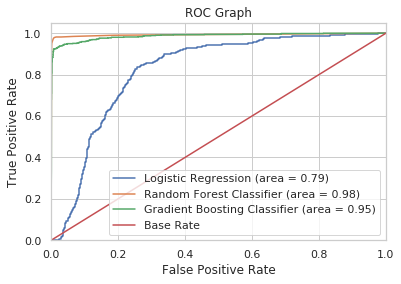

In [322]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()


#### Confusion Matrix

In [325]:
print ("\n\n ---Logistic Regression Confusion Matrix---")
print(confusion_matrix(y_test, lr.predict(X_test)))
print ("\n\n ---Random Forest Confusion Matrix---")
print(confusion_matrix(y_test, rf.predict(X_test)))
print ("\n\n ---Gradient Boosting Confusion Matrix---")
print(confusion_matrix(y_test, gbc.predict(X_test)))



 ---Logistic Regression Confusion Matrix---
[[1709  577]
 [ 125  589]]


 ---Random Forest Confusion Matrix---
[[2272   14]
 [  20  694]]


 ---Gradient Boosting Confusion Matrix---
[[2232   54]
 [  47  667]]


### Interpreting the Data

The random forest model has the highest AUC score when comparing the 3 models. Thus, we will use this model to try and understand the key components of employee turnover.

#### Feature Importance

From the random forest model, we can conclude the five most important features for turnover are:
1. Satisfaction
2. Years at Company
3. Project Count
4. Average Monthly Hours
5. Evaluation

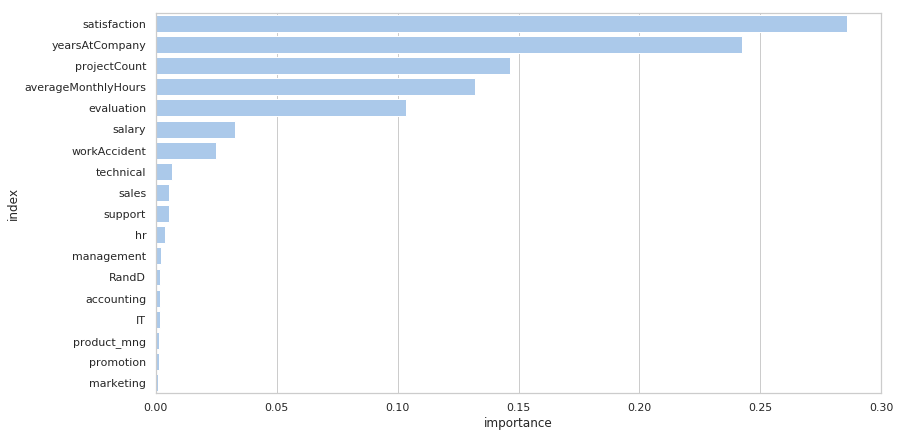

In [284]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()

f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

## Retention Plan

The goal of creating this model is to have a general understanding on why it is employees are unhappy and how can we go about to fix this issue. This newly trained/validated model has the ability to predict the probability of  employee turnover and can be a powerful tool. The idea will be to use this model as a measure of how happy an employee is and catch the issue before he/she leaves the company. We can break the employees in 4 different groups to easily handle this issue.
1. No Risk (0.0-0.25): Employees are considered happy and no risk of turnover.
2. Low Risk (0.25-0.50): Employees are at low risk of turnover. Employees should be monitored and action should be taken.
3. Medium Risk (0.50-0.75): Employees with this score are at risk of turnover. The employees should be monitored and action should be taken
4. High Risk (0.75-1.00): Employees with this score have the highest chance of turnover. The issues must be dealt with immediately 

In [301]:
rf.predict_proba(X_test)[:10]

array([[1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

## Conclusion

The ability to predict the probability of employee turnover is a powerful tool. HR can focus their time on the unhappy employees to prevent employees from leaving. 

Another powerful tool is feature importance. Allowing us to gain insight on why it is employees are unhappy and leaving the company, we can get ahead of the issue before it causes too much harm. For example, the company can work on limiting the project count to create an overall better environment which can in turn lower the rate of turnover.

Here are some potential solutions to take into consideration:

Solution 1:
- We can lower the overall turnover by targeting potential issues such as project count and average monthly hours
- From our EDA, we have learned that there is a sweet spot on how many projects a happy employee should have
- Since these two features are correlated, we can focus on project count, which in turn lowers average monthly hours
- In doing so, we can observe and monitor the overall happiness of the employees 

Solution 2:
- We can rank the employees by their probability of turnover and focus on the employees with the highest probability of leaving the company
- There can be incentive programs to stay which can lower the rate of turnover


Data Collection Bias:
- We are not aware if the employees are full-time, part-time, contractors, or interns. Thus, some of this data is generalizing to full time which can be bias.
- Evaluations can be bias by how it is collected and by who